In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [21]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"), nrows= 100000)
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           100000 non-null  int64  
 1   user_id              100000 non-null  int64  
 2   location             100000 non-null  object 
 3   age                  100000 non-null  float64
 4   isbn                 100000 non-null  object 
 5   rating               100000 non-null  int64  
 6   book_title           100000 non-null  object 
 7   book_author          100000 non-null  object 
 8   year_of_publication  100000 non-null  float64
 9   publisher            100000 non-null  object 
 10  img_s                100000 non-null  object 
 11  img_m                100000 non-null  object 
 12  img_l                100000 non-null  object 
 13  Summary              100000 non-null  object 
 14  Language             100000 non-null  object 
 15  Category          

In [17]:
model_columns = df.drop(["book_title", "img_m", "img_l", "img_s", "Summary", "isbn", "location", "Unnamed: 0"], axis=1)
model_columns.head()

,user_id,age,rating,book_author,year_of_publication,publisher,Language,Category,city,state,country
0,2,18.0000,0,Mark P. O. Morford,2002.0,Oxford University Press,en,['Social Science'],stockton,california,usa
1,8,34.7439,5,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],timmins,ontario,canada
2,11400,49.0000,0,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],ottawa,ontario,canada
3,11676,34.7439,8,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],NaN,NaN,NaN
4,41385,34.7439,0,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],sudbury,ontario,canada


In [9]:
y = df["book_title"]
#target_names = ["negative", "positive"]
y

0        Classical Mythology
1               Clara Callan
2               Clara Callan
3               Clara Callan
4               Clara Callan
                ...         
99995            Angel Falls
99996            Angel Falls
99997            Angel Falls
99998            Angel Falls
99999            Angel Falls
Name: book_title, Length: 100000, dtype: object

In [10]:
X = df.drop(["book_title", "img_m", "img_l", "img_s", "Summary", "isbn", "location", "Unnamed: 0"], axis=1)
X.head()

,user_id,age,rating,book_author,year_of_publication,publisher,Language,Category,city,state,country
0,2,18.0000,0,Mark P. O. Morford,2002.0,Oxford University Press,en,['Social Science'],stockton,california,usa
1,8,34.7439,5,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],timmins,ontario,canada
2,11400,49.0000,0,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],ottawa,ontario,canada
3,11676,34.7439,8,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],NaN,NaN,NaN
4,41385,34.7439,0,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,['Actresses'],sudbury,ontario,canada


In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['embarked','class1','deck1','who','embark_town','sex','adult_male','alive','alone']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(impute_data[columns])

In [19]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

label_encoder = LabelEncoder()
label_encoder.fit(X)
encoded_X = label_encoder.transform(X)
encoded_X

ValueError: y should be a 1d array, got an array of shape (100000, 11) instead.

In [17]:
#for label, original_class in zip(encoded_y, y):
#    print('Original Class: ' + str(original_class))
#    print('Encoded Label: ' + str(label))
#    print('-' * 12)

#Can't run this on local machine
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

ValueError: could not convert string to float: 'Gloria Steinem'

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.630
k: 3, Train/Test Score: 0.865/0.698
k: 5, Train/Test Score: 0.833/0.682
k: 7, Train/Test Score: 0.809/0.698
k: 9, Train/Test Score: 0.816/0.677
k: 11, Train/Test Score: 0.800/0.688
k: 13, Train/Test Score: 0.797/0.677
k: 15, Train/Test Score: 0.807/0.719
k: 17, Train/Test Score: 0.800/0.724
k: 19, Train/Test Score: 0.788/0.703


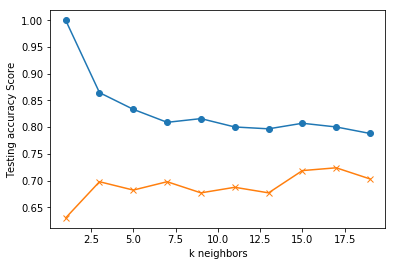

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.677
